## Mask R-CNN - Inspect Weights of a Trained Model

This notebook includes code and visualizations to test, debug, and evaluate the Mask R-CNN model.

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('../')
import os
import sys
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import keras

import mrcnn.utils
import mrcnn.model_mod as modellib
import mrcnn.visualize as visualize
from mrcnn.utils import log

%matplotlib inline 

# Root directory of the project
# ROOT_DIR = os.getcwd()

# Directory to save logs and trained model
# MODEL_DIR = os.path.join(ROOT_DIR, "logs")

# Path to COCO trained weights
# COCO_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_coco.h5")
ROOT_DIR          = "E:\\"
MODEL_PATH        = os.path.join(ROOT_DIR, "models")
DATASET_PATH      = os.path.join(ROOT_DIR, 'MLDatasets')
#### MODEL_DIR    = os.path.join(MODEL_PATH, "mrcnn_logs")
COCO_MODEL_PATH   = os.path.join(MODEL_PATH, "mask_rcnn_coco.h5")
DEFAULT_LOGS_DIR  = os.path.join(MODEL_PATH, "mrcnn_coco_logs")
COCO_DATASET_PATH = os.path.join(DATASET_PATH,"coco2014")
RESNET_MODEL_PATH = os.path.join(MODEL_PATH, "resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5")
# Path to Shapes trained weights

# model_file  = 'E:\\Models\\newshape_fcn\\mask_rcnn_shapes_0991.h5'
folder_name = 'newshape_fcn'
MODEL_DIR = os.path.join(MODEL_PATH, folder_name)

# SHAPES_MODEL_PATH = os.path.join(ROOT_DIR, "mask_rcnn_shapes.h5")
SHAPES_MODEL_PATH = 'E:\\Models\\newshape_mrcnn\\shapes20180621T1554\\mask_rcnn_shapes_0110.h5'

D:\Program Files\Anaconda3\envs\TF_gpu\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Configurations

In [2]:
# Run one of the code blocks

# Shapes toy dataset
import mrcnn.new_shapes as shapes
config = shapes.NewShapesConfig()

# MS COCO Dataset
# import coco
# config = coco.CocoConfig()

 Initialize config object - super
(56, 56)


## Notebook Preferences

In [3]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

In [4]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

## Load Model

In [7]:
# Create model in inference mode
del model
with tf.device(DEVICE):
#     model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)
    model = modellib.MaskRCNN(mode="inference", config=config, model_dir=MODEL_DIR, FCN_layers = True)

>>> Initialize model WITHOUT MASKING LAYERS!!!!
    set_log_dir: Checkpoint path set to : E:\models\newshape_fcn\shapes20180630T1744\mask_rcnn_shapes_{epoch:04d}.h5
    set_log_dir: self.epoch set to 0 

>>> Resnet Graph 
     Input_image shape : (?, 128, 128, 3)
     After ZeroPadding2D  : (?, 134, 134, 3) (?, 134, 134, 3)
     After Conv2D padding : (?, 64, 64, 64) (?, 64, 64, 64)
     After BatchNorm      : (?, 64, 64, 64) (?, 64, 64, 64)
     C1 Shape: (?, 32, 32, 64) (?, 32, 32, 64)
     C2 Shape:  (?, 32, 32, 256) (?, 32, 32, 256)
     C3 Shape:  (?, 16, 16, 512) (?, 16, 16, 512)
     C4 Shape:  (?, 8, 8, 1024) (?, 8, 8, 1024)
     C5 Shape:  (?, 4, 4, 2048) (?, 4, 4, 2048)

>>> Feature Pyramid Network (FPN) Graph 
     FPN P2 shape : (None, 32, 32, 256)
     FPN P3 shape : (None, 16, 16, 256)
     FPN P4 shape : (None, 8, 8, 256)
     FPN P5 shape : (None, 4, 4, 256)
     FPN P6 shape : (None, 2, 2, 256)

>>> RPN Layer 
     Input_feature_map shape : (?, ?, ?, 256)
     anchors_

    fcn_scores  final shape :  (?, ?, ?, ?)  Keras tensor  False
    complete

    Output build_fcn_score 
     pred_heatmap_norm  :  (?, ?, ?, ?) Keras tensor  False
     complete
 self.keras_model.losses :  6
[<tf.Tensor 'fcn_block5_conv3/add:0' shape=() dtype=float32>, <tf.Tensor 'fcn_block5_conv1/add:0' shape=() dtype=float32>, <tf.Tensor 'fcn_block5_conv2/add:0' shape=() dtype=float32>, <tf.Tensor 'fcn_block4_conv2/add:0' shape=() dtype=float32>, <tf.Tensor 'fcn_block4_conv1/add:0' shape=() dtype=float32>, <tf.Tensor 'fcn_block4_conv3/add:0' shape=() dtype=float32>]

>>> MODIFIED MaskRCNN build complete -- WITHOUT MASKING LAYERS!!!!
>>> MODIFIED MaskRCNN initialization complete -- WITHOUT MASKING LAYERS!!!!


In [11]:
   
# SHAPES_MODEL_PATH = 'E:\\Models\\newshape_fcn\\mask_rcnn_shapes_0589.h5'    
SHAPES_MODEL_PATH = 'E:\\Models\\newshape_mrcnn\\shapes20180621T1554\\mask_rcnn_shapes_0110.h5'
# Set weights file path
if config.NAME == "shapes":
    weights_path = SHAPES_MODEL_PATH
elif config.NAME == "coco":
    weights_path = COCO_MODEL_PATH
# Or, uncomment to load the last model you trained
# weights_path = model.find_last()[1]
print('Weights model path:', weights_path)
# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Weights model path: E:\Models\newshape_mrcnn\shapes20180621T1554\mask_rcnn_shapes_0110.h5
Loading weights  E:\Models\newshape_mrcnn\shapes20180621T1554\mask_rcnn_shapes_0110.h5
>>> load_weights()
    load_weights: Loading weights from: E:\Models\newshape_mrcnn\shapes20180621T1554\mask_rcnn_shapes_0110.h5



--------------------
 List of all Layers  
--------------------



>layer 0 : name : input_image                               type: <keras.engine.topology.InputLayer object at 0x000002097F6979B0>
>layer 1 : name : zero_padding2d_2                          type: <keras.layers.convolutional.ZeroPadding2D object at 0x000002097F697A90>
>layer 2 : name : conv1                                     type: <keras.layers.convolutional.Conv2D object at 0x000002097F6979E8>
>layer 3 : name : bn_conv1                                  type: <mrcnn.batchnorm_layer.BatchNorm object at 0x000002097F697DD8>
>layer 4 : name : activation_37                             type: <keras.layers.core.Activation 

    load_weights: Log directory set to : E:\Models\newshape_mrcnn\shapes20180621T1554\mask_rcnn_shapes_0110.h5
    set_log_dir: Checkpoint path set to : E:\models\newshape_fcn\shapes20180621T1554\mask_rcnn_shapes_{epoch:04d}.h5
    set_log_dir: self.epoch set to 111 
    Load weights complete :  E:\Models\newshape_mrcnn\shapes20180621T1554\mask_rcnn_shapes_0110.h5


'E:\\Models\\newshape_mrcnn\\shapes20180621T1554\\mask_rcnn_shapes_0110.h5'

## Review Weight Stats

In [9]:
# Show stats of all trainable weights    
visualize.display_weight_stats(model)

WEIGHT NAME,SHAPE,MIN,MAX,STD
conv1_1/kernel:0,"(7, 7, 3, 64)",-0.0427,+0.0427,+0.0250
conv1_1/bias:0,"(64,)",+0.0000,+0.0000,+0.0000
bn_conv1_1/gamma:0*** dead?,"(64,)",+1.0000,+1.0000,+0.0000
bn_conv1_1/beta:0*** dead?,"(64,)",+0.0000,+0.0000,+0.0000
bn_conv1_1/moving_mean:0*** dead?,"(64,)",+0.0000,+0.0000,+0.0000
bn_conv1_1/moving_variance:0*** dead?,"(64,)",+1.0000,+1.0000,+0.0000
res2a_branch2a_1/kernel:0,"(1, 1, 64, 64)",-0.2163,+0.2165,+0.1240
res2a_branch2a_1/bias:0,"(64,)",+0.0000,+0.0000,+0.0000
bn2a_branch2a_1/gamma:0*** dead?,"(64,)",+1.0000,+1.0000,+0.0000
bn2a_branch2a_1/beta:0*** dead?,"(64,)",+0.0000,+0.0000,+0.0000


# Histograms of Weights

TODO: cleanup this part

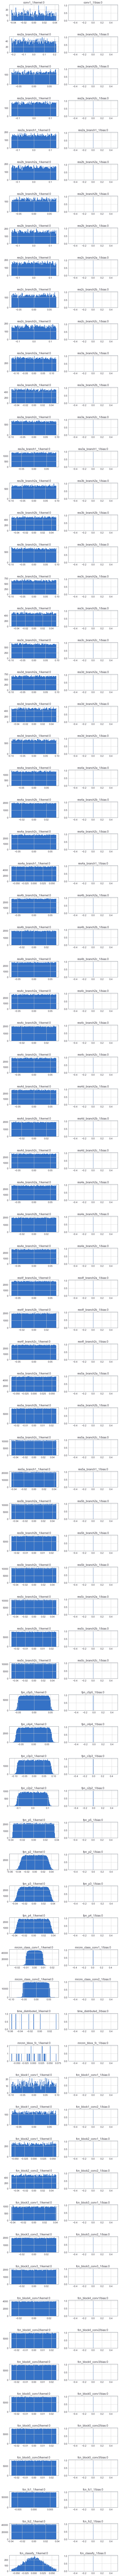

In [10]:
# Pick layer types to display
LAYER_TYPES = ['Conv2D', 'Dense', 'Conv2DTranspose']
# Get layers
layers = model.get_trainable_layers()
layers = list(filter(lambda l: l.__class__.__name__ in LAYER_TYPES, 
                layers))
# Display Histograms
fig, ax = plt.subplots(len(layers), 2, figsize=(10, 3*len(layers)),
                       gridspec_kw={"hspace":1})
for l, layer in enumerate(layers):
    weights = layer.get_weights()
    for w, weight in enumerate(weights):
        tensor = layer.weights[w]
        ax[l, w].set_title(tensor.name)
        _ = ax[l, w].hist(weight[w].flatten(), 100)


### Load Weights

In [12]:
# Create model in inference mode
# with tf.device(DEVICE):
#     model = modellib.MaskRCNN(mode="inference", config=config, model_dir=MODEL_DIR, FCN_layers = False)
    
weights_path= 'E:\\Models\\newshape_mrcnn\\shapes20180621T1554\\mask_rcnn_shapes_0320.h5'
# Set weights file path
# Or, uncomment to load the last model you trained
# weights_path = model.find_last()[1]
# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

Weights model path: E:\Models\newshape_mrcnn\shapes20180621T1554\mask_rcnn_shapes_0320.h5
Loading weights  E:\Models\newshape_mrcnn\shapes20180621T1554\mask_rcnn_shapes_0320.h5
>>> load_weights()
    load_weights: Loading weights from: E:\Models\newshape_mrcnn\shapes20180621T1554\mask_rcnn_shapes_0320.h5



--------------------
 List of all Layers  
--------------------



>layer 0 : name : input_image                               type: <keras.engine.topology.InputLayer object at 0x000002097F6979B0>
>layer 1 : name : zero_padding2d_2                          type: <keras.layers.convolutional.ZeroPadding2D object at 0x000002097F697A90>
>layer 2 : name : conv1                                     type: <keras.layers.convolutional.Conv2D object at 0x000002097F6979E8>
>layer 3 : name : bn_conv1                                  type: <mrcnn.batchnorm_layer.BatchNorm object at 0x000002097F697DD8>
>layer 4 : name : activation_37                             type: <keras.layers.core.Activation 

    load_weights: Log directory set to : E:\Models\newshape_mrcnn\shapes20180621T1554\mask_rcnn_shapes_0320.h5
    set_log_dir: Checkpoint path set to : E:\models\newshape_fcn\shapes20180621T1554\mask_rcnn_shapes_{epoch:04d}.h5
    set_log_dir: self.epoch set to 321 
    Load weights complete :  E:\Models\newshape_mrcnn\shapes20180621T1554\mask_rcnn_shapes_0320.h5


'E:\\Models\\newshape_mrcnn\\shapes20180621T1554\\mask_rcnn_shapes_0320.h5'

## Review Weight Stats

In [13]:
# Show stats of all trainable weights    
visualize.display_weight_stats(model)

WEIGHT NAME,SHAPE,MIN,MAX,STD
conv1_1/kernel:0,"(7, 7, 3, 64)",-0.0427,+0.0427,+0.0250
conv1_1/bias:0,"(64,)",+0.0000,+0.0000,+0.0000
bn_conv1_1/gamma:0*** dead?,"(64,)",+1.0000,+1.0000,+0.0000
bn_conv1_1/beta:0*** dead?,"(64,)",+0.0000,+0.0000,+0.0000
bn_conv1_1/moving_mean:0*** dead?,"(64,)",+0.0000,+0.0000,+0.0000
bn_conv1_1/moving_variance:0*** dead?,"(64,)",+1.0000,+1.0000,+0.0000
res2a_branch2a_1/kernel:0,"(1, 1, 64, 64)",-0.2163,+0.2165,+0.1240
res2a_branch2a_1/bias:0,"(64,)",+0.0000,+0.0000,+0.0000
bn2a_branch2a_1/gamma:0*** dead?,"(64,)",+1.0000,+1.0000,+0.0000
bn2a_branch2a_1/beta:0*** dead?,"(64,)",+0.0000,+0.0000,+0.0000


# Histograms of Weights

TODO: cleanup this part

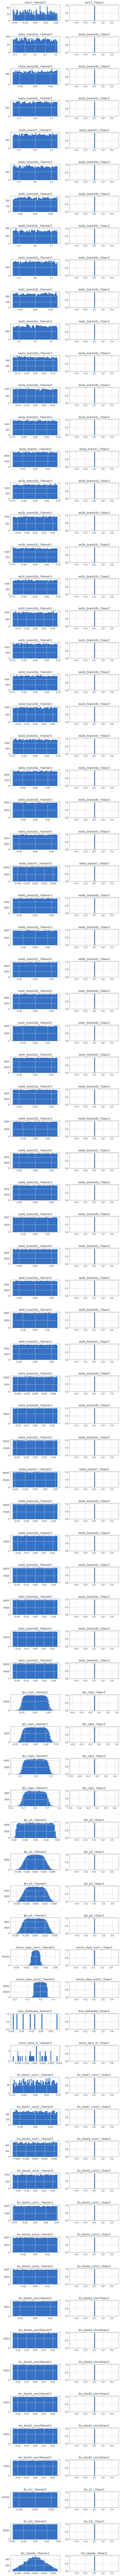

In [14]:
# Pick layer types to display
LAYER_TYPES = ['Conv2D', 'Dense', 'Conv2DTranspose']
# Get layers
layers = model.get_trainable_layers()
layers = list(filter(lambda l: l.__class__.__name__ in LAYER_TYPES, 
                layers))
# Display Histograms
fig, ax = plt.subplots(len(layers), 2, figsize=(10, 3*len(layers)),
                       gridspec_kw={"hspace":1})
for l, layer in enumerate(layers):
    weights = layer.get_weights()
    for w, weight in enumerate(weights):
        tensor = layer.weights[w]
        ax[l, w].set_title(tensor.name)
        _ = ax[l, w].hist(weight[w].flatten(), 50)

In [ ]:
weights_path= 'E:\\Models\\newshape_mrcnn\\shapes20180621T1554\\mask_rcnn_shapes_0484.h5'

# Or, uncomment to load the last model you trained
# weights_path = model.find_last()[1]
# Load weights
print("Loading weights ", weights_path)
model.load_weights(weights_path, by_name=True)

# Histograms of Weights

Loading weights  E:\Models\newshape_mrcnn\shapes20180621T1554\mask_rcnn_shapes_0484.h5
>>> load_weights()
    load_weights: Loading weights from: E:\Models\newshape_mrcnn\shapes20180621T1554\mask_rcnn_shapes_0484.h5



--------------------
 List of all Layers  
--------------------



>layer 0 : name : input_image                               type: <keras.engine.topology.InputLayer object at 0x000002097F6979B0>
>layer 1 : name : zero_padding2d_2                          type: <keras.layers.convolutional.ZeroPadding2D object at 0x000002097F697A90>
>layer 2 : name : conv1                                     type: <keras.layers.convolutional.Conv2D object at 0x000002097F6979E8>
>layer 3 : name : bn_conv1                                  type: <mrcnn.batchnorm_layer.BatchNorm object at 0x000002097F697DD8>
>layer 4 : name : activation_37                             type: <keras.layers.core.Activation object at 0x000002097F697B00>
>layer 5 : name : max_pooling2d_2                           

    load_weights: Log directory set to : E:\Models\newshape_mrcnn\shapes20180621T1554\mask_rcnn_shapes_0484.h5
    set_log_dir: Checkpoint path set to : E:\models\newshape_fcn\shapes20180621T1554\mask_rcnn_shapes_{epoch:04d}.h5
    set_log_dir: self.epoch set to 485 
    Load weights complete :  E:\Models\newshape_mrcnn\shapes20180621T1554\mask_rcnn_shapes_0484.h5


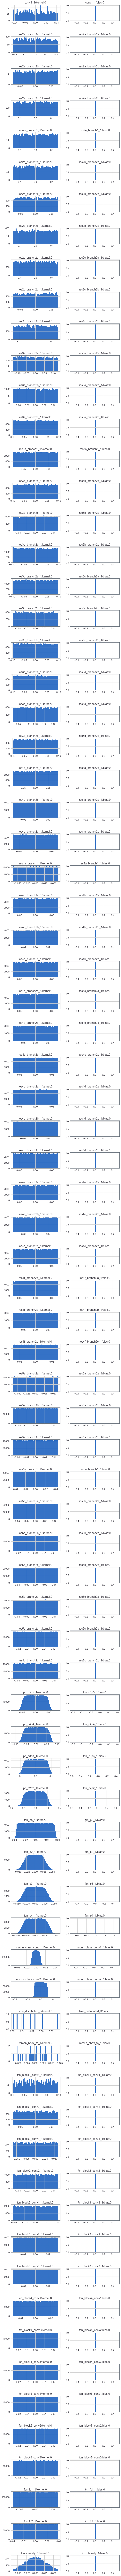

In [16]:
# Pick layer types to display
LAYER_TYPES = ['Conv2D', 'Dense', 'Conv2DTranspose']
# Get layers
layers = model.get_trainable_layers()
layers = list(filter(lambda l: l.__class__.__name__ in LAYER_TYPES, 
                layers))
# Display Histograms
fig, ax = plt.subplots(len(layers), 2, figsize=(10, 3*len(layers)),
                       gridspec_kw={"hspace":1})
for l, layer in enumerate(layers):
    weights = layer.get_weights()
    for w, weight in enumerate(weights):
        tensor = layer.weights[w]
        ax[l, w].set_title(tensor.name)
        _ = ax[l, w].hist(weight[w].flatten(), 50)